# ラビットチャレンジ/深層学習day2/フレームワーク演習:正則化/最適化
## 100文字以上の要点まとめ

学習の安定化-過学習・未学習の回避-
過学習を抑制する方法として以下の手法がある。
・（パラメータ）正則化  
　L1正則化  
　L2正則化  
　Elastic Net(L1,L2正則化を組み合わせたもの)  
 
　正則化とは、ネットワークの自由度（層数、ノード数、パラメータの値、etc・・・)を制約することである。
そのためにはモデルの複雑さを抑制し、訓練サンプルに対する過剰適合を抑制する必要がある。
 
・正則化レイヤー  
　Dropout  

　ランダムにノードを削除して学習させる。データ量はそのままで、より疎なモデルで学習することで過学習を抑制する。

・正規化レイヤー  
　Batch正規化  
 　C $\times$ H $\times$  W のサンプルがN個あった場合に、N個の同一チャンネルが正規化の単位。ミニバッチのサイズを大きく取れない場合には、効果が薄くなってしまう。  
  
　Layer正規化   
　 N個のサンプルのうち一つに注目。C $\times$ H $\times$  W の全てのPixelが正規化の単位。ミニバッチの数に依存しないので、Batch正規化の問題を解消できていると考えられる。  
 
　Instance正規化   
　各サンプルの各チャンネルごとに正規化。  
　Batch正規化の際のバッチサイズが1の場合と等価。  
 
　データの正規化(Normalization)。レイヤー間を流れるデータの分布を、何らかの単位で平均が0,分散が1になるように正規化する。

## 実装演習

In [2]:
!pip install tensorflow

     |████████████████████████████████| 217.4 MB 10 kB/s  eta 0:00:012    |████                            | 26.6 MB 11.1 MB/s eta 0:00:18     |██████████████████████████████▏ | 204.9 MB 2.0 MB/s eta 0:00:07     |██████████████████████████████▎ | 205.8 MB 2.0 MB/s eta 0:00:06
     |████████████████████████████████| 5.8 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 581 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 82 kB/s eta 0:00:011
     |████████████████████████████████| 65 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 717 kB/s eta 0:00:01
     |████████████████████████████████| 13.0

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
# 正則化なし
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 43s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [5]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

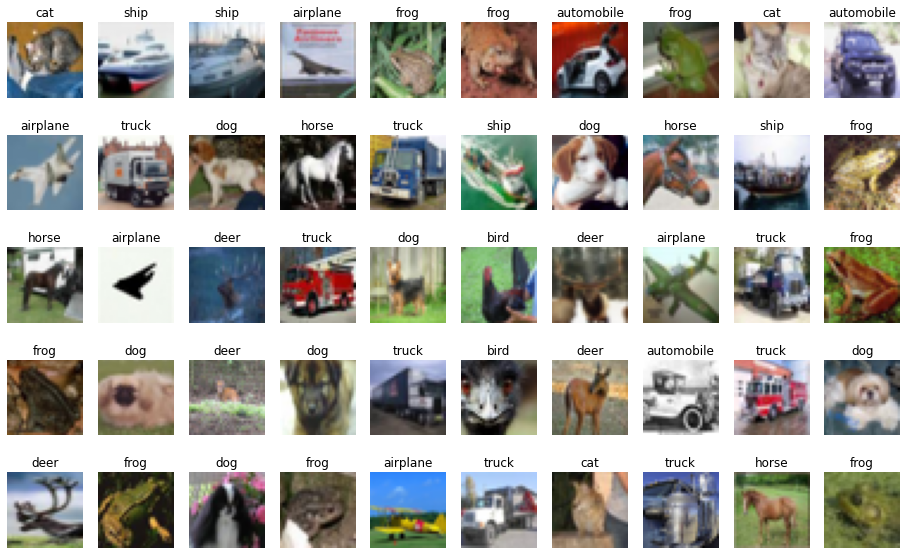

In [6]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

In [7]:
epochs = 5
batch_size = 256

In [8]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [9]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [10]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 35s 177ms/step - loss: 1.5204 - acc: 0.4595 - val_loss: 1.2284 - val_acc: 0.5650
Epoch 2/5
196/196 [==============================] - 36s 183ms/step - loss: 1.1074 - acc: 0.6111 - val_loss: 1.0574 - val_acc: 0.6271
Epoch 3/5
196/196 [==============================] - 33s 170ms/step - loss: 0.9512 - acc: 0.6656 - val_loss: 0.9806 - val_acc: 0.6568
Epoch 4/5
196/196 [==============================] - 35s 177ms/step - loss: 0.8477 - acc: 0.7025 - val_loss: 0.9689 - val_acc: 0.6615
Epoch 5/5
196/196 [==============================] - 34s 174ms/step - loss: 0.7366 - acc: 0.7443 - val_loss: 0.9365 - val_acc: 0.6772


In [11]:
# L1正則化

def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [12]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [13]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 35s 172ms/step - loss: 1.9064 - acc: 0.3586 - val_loss: 1.6007 - val_acc: 0.4850
Epoch 2/5
196/196 [==============================] - 34s 175ms/step - loss: 1.4790 - acc: 0.5269 - val_loss: 1.3848 - val_acc: 0.5558
Epoch 3/5
196/196 [==============================] - 36s 183ms/step - loss: 1.3045 - acc: 0.5847 - val_loss: 1.2870 - val_acc: 0.5933
Epoch 4/5
196/196 [==============================] - 38s 193ms/step - loss: 1.1869 - acc: 0.6235 - val_loss: 1.2020 - val_acc: 0.6216
Epoch 5/5
196/196 [==============================] - 38s 193ms/step - loss: 1.0958 - acc: 0.6591 - val_loss: 1.1429 - val_acc: 0.6412


In [14]:
# L2正則化
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [15]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7200)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               3686912   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                      

In [16]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 36s 182ms/step - loss: 1.5497 - acc: 0.4990 - val_loss: 1.2427 - val_acc: 0.6101
Epoch 2/5
196/196 [==============================] - 37s 189ms/step - loss: 1.1052 - acc: 0.6592 - val_loss: 1.0794 - val_acc: 0.6633
Epoch 3/5
196/196 [==============================] - 35s 178ms/step - loss: 0.9222 - acc: 0.7203 - val_loss: 1.0184 - val_acc: 0.6750
Epoch 4/5
196/196 [==============================] - 36s 183ms/step - loss: 0.7780 - acc: 0.7767 - val_loss: 0.9654 - val_acc: 0.6987
Epoch 5/5
196/196 [==============================] - 33s 170ms/step - loss: 0.6459 - acc: 0.8282 - val_loss: 0.9689 - val_acc: 0.6988


In [17]:
# Elastinet
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', activity_regularizer=tf.keras.regularizers.L1L2(0.01)),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [18]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               3686912   
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                      

In [19]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 36s 181ms/step - loss: 1.8771 - acc: 0.3689 - val_loss: 1.5665 - val_acc: 0.4965
Epoch 2/5
196/196 [==============================] - 35s 179ms/step - loss: 1.4462 - acc: 0.5389 - val_loss: 1.3685 - val_acc: 0.5684
Epoch 3/5
196/196 [==============================] - 33s 170ms/step - loss: 1.2645 - acc: 0.6045 - val_loss: 1.2724 - val_acc: 0.5990
Epoch 4/5
196/196 [==============================] - 33s 170ms/step - loss: 1.1421 - acc: 0.6480 - val_loss: 1.1642 - val_acc: 0.6409
Epoch 5/5
196/196 [==============================] - 34s 174ms/step - loss: 1.0432 - acc: 0.6825 - val_loss: 1.1369 - val_acc: 0.6506


In [20]:
#　各正則化手法の比較
def create_model(input_shape, class_num, regularization_method, regularization_method_weight=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu',
                              activity_regularizer=regularization_method(regularization_method_weight)) if regularization_method else tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [21]:
epochs = 10
batch_size = 256

regularizers = [
                None,
                tf.keras.regularizers.L1,
                tf.keras.regularizers.L2,
                tf.keras.regularizers.L1L2
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for regularizer in regularizers:
    model = create_model(x_train.shape, 10, regularizer)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 34s 168ms/step - loss: 1.5259 - acc: 0.4540 - val_loss: 1.2897 - val_acc: 0.5531
Epoch 2/10
196/196 [==============================] - 34s 172ms/step - loss: 1.1333 - acc: 0.6038 - val_loss: 1.0732 - val_acc: 0.6259
Epoch 3/10
196/196 [==============================] - 33s 169ms/step - loss: 0.9699 - acc: 0.6614 - val_loss: 1.0270 - val_acc: 0.6391
Epoch 4/10
196/196 [==============================] - 33s 168ms/step - loss: 0.8571 - acc: 0.7013 - val_loss: 0.9624 - val_acc: 0.6636
Epoch 5/10
196/196 [==============================] - 34s 172ms/step - loss: 0.7426 - acc: 0.7437 - val_loss: 0.9196 - val_acc: 0.6810
Epoch 6/10
196/196 [==============================] - 33s 170ms/step - loss: 0.6505 - acc: 0.7738 - val_loss: 0.9055 - val_acc: 0.6877
Epoch 7/10
196/196 [==============================] - 34s 172ms/step - loss: 0.5395 - acc: 0.8144 - val_loss: 0.9741 - val_acc: 0.6816
Epoch 8/10
196/196 [==============================] - 3

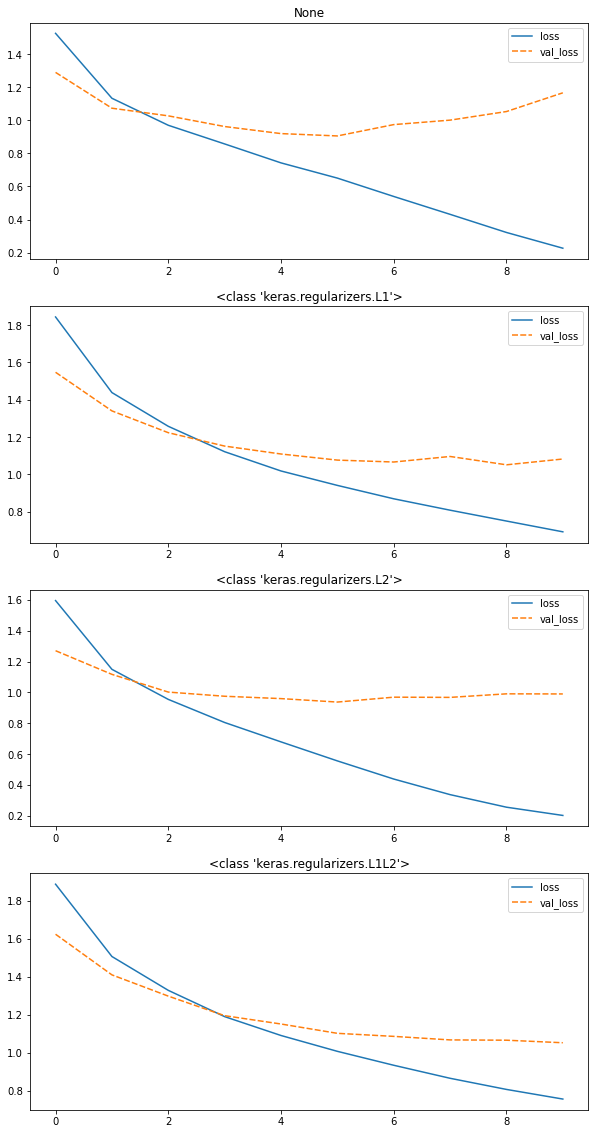

In [22]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    regularizer_name = str(regularizers[i])
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(regularizer_name)

### 実装考察
正則化なしでは過学習は抑えることはできなかったが、正則化することで過学習を抑えることができた。
L1正則化、L2正則化、Elastinetすべてでval_lossの上昇を抑えることができている。

In [23]:
# 正規化レイヤー
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [25]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

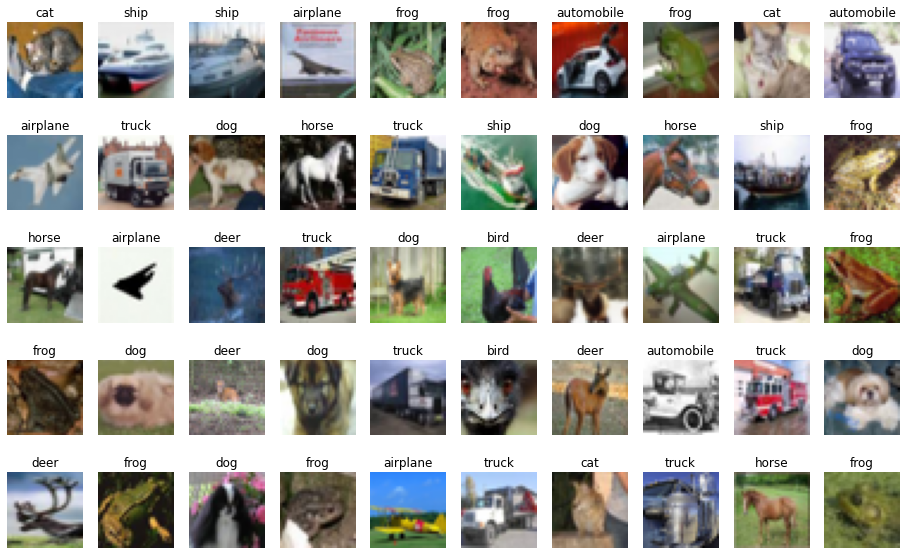

In [26]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

In [27]:
# 正規化レイヤーなし
epochs = 5
batch_size = 256

In [28]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [29]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 7200)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               3686912   
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                      

In [30]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 38s 194ms/step - loss: 1.5204 - acc: 0.4557 - val_loss: 1.2703 - val_acc: 0.5606
Epoch 2/5
196/196 [==============================] - 37s 191ms/step - loss: 1.1132 - acc: 0.6116 - val_loss: 1.0523 - val_acc: 0.6342
Epoch 3/5
196/196 [==============================] - 37s 188ms/step - loss: 0.9408 - acc: 0.6715 - val_loss: 0.9873 - val_acc: 0.6564
Epoch 4/5
196/196 [==============================] - 37s 190ms/step - loss: 0.8146 - acc: 0.7185 - val_loss: 0.9560 - val_acc: 0.6645
Epoch 5/5
196/196 [==============================] - 37s 190ms/step - loss: 0.6963 - acc: 0.7594 - val_loss: 0.9146 - val_acc: 0.6823


In [31]:
# 正規化レイヤーあり
# Batch正規化　1層目のCNNの後にBatch正規化を適用した場合b
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [32]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 7200)              0         
                                                                 
 dense_18 (Dense)            (None, 512)              

In [33]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 48s 239ms/step - loss: 1.8491 - acc: 0.3938 - val_loss: 1.8413 - val_acc: 0.4692
Epoch 2/5
196/196 [==============================] - 47s 241ms/step - loss: 1.1582 - acc: 0.5932 - val_loss: 1.3999 - val_acc: 0.5699
Epoch 3/5
196/196 [==============================] - 46s 236ms/step - loss: 0.9665 - acc: 0.6643 - val_loss: 1.0493 - val_acc: 0.6471
Epoch 4/5
196/196 [==============================] - 48s 247ms/step - loss: 0.8519 - acc: 0.7042 - val_loss: 0.9870 - val_acc: 0.6526
Epoch 5/5
196/196 [==============================] - 43s 219ms/step - loss: 0.7579 - acc: 0.7374 - val_loss: 0.9843 - val_acc: 0.6642


In [34]:
# layer正規化
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.LayerNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [35]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 layer_normalization (LayerN  (None, 32, 32, 32)       64        
 ormalization)                                                   
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 7200)              0         
                                                                 
 dense_20 (Dense)            (None, 512)             

In [36]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 64s 320ms/step - loss: 1.7134 - acc: 0.4272 - val_loss: 1.2662 - val_acc: 0.5377
Epoch 2/5
196/196 [==============================] - 62s 317ms/step - loss: 1.0925 - acc: 0.6159 - val_loss: 1.0466 - val_acc: 0.6292
Epoch 3/5
196/196 [==============================] - 61s 313ms/step - loss: 0.8346 - acc: 0.7070 - val_loss: 0.9452 - val_acc: 0.6711
Epoch 4/5
196/196 [==============================] - 62s 316ms/step - loss: 0.5927 - acc: 0.7964 - val_loss: 0.9533 - val_acc: 0.6743
Epoch 5/5
196/196 [==============================] - 61s 313ms/step - loss: 0.3733 - acc: 0.8761 - val_loss: 1.0401 - val_acc: 0.6773


In [39]:
# Instance正規化　1層目のCNNの後にInstance正規化を適用した場合
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tfa.layers.InstanceNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [42]:
#Instance正規化のため
!pip install -U tensorflow-addons

     |████████████████████████████████| 588 kB 1.3 MB/s eta 0:00:01


In [43]:
import tensorflow_addons as tfa
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 instance_normalization (Ins  (None, 32, 32, 32)       64        
 tanceNormalization)                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 7200)              0         
                                                                 
 dense_22 (Dense)            (None, 512)             

In [44]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 48s 242ms/step - loss: 1.7991 - acc: 0.4162 - val_loss: 1.2229 - val_acc: 0.5689
Epoch 2/5
196/196 [==============================] - 47s 241ms/step - loss: 1.0828 - acc: 0.6186 - val_loss: 1.0009 - val_acc: 0.6477
Epoch 3/5
196/196 [==============================] - 47s 237ms/step - loss: 0.9077 - acc: 0.6834 - val_loss: 0.9474 - val_acc: 0.6711
Epoch 4/5
196/196 [==============================] - 46s 236ms/step - loss: 0.8051 - acc: 0.7196 - val_loss: 0.9392 - val_acc: 0.6694
Epoch 5/5
196/196 [==============================] - 46s 237ms/step - loss: 0.7220 - acc: 0.7489 - val_loss: 0.9217 - val_acc: 0.6846


In [45]:
# 各正規化手法の比較
# Batch正規化、Layer正規化、Instance正規化をそれそれ適用した場合

def create_model(input_shape, class_num, norm_layer):
    if norm_layer:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            norm_layer(),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [46]:
epochs = 10
batch_size = 256

norm_layers = [
                None,
                tf.keras.layers.BatchNormalization,
                tf.keras.layers.LayerNormalization,
                tfa.layers.InstanceNormalization
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for norm_layer in norm_layers:
    model = create_model(x_train.shape, 10, norm_layer)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 34s 171ms/step - loss: 1.5259 - acc: 0.4540 - val_loss: 1.2897 - val_acc: 0.5531
Epoch 2/10
196/196 [==============================] - 33s 167ms/step - loss: 1.1333 - acc: 0.6038 - val_loss: 1.0732 - val_acc: 0.6259
Epoch 3/10
196/196 [==============================] - 33s 169ms/step - loss: 0.9699 - acc: 0.6614 - val_loss: 1.0270 - val_acc: 0.6391
Epoch 4/10
196/196 [==============================] - 33s 169ms/step - loss: 0.8571 - acc: 0.7013 - val_loss: 0.9624 - val_acc: 0.6636
Epoch 5/10
196/196 [==============================] - 33s 168ms/step - loss: 0.7426 - acc: 0.7437 - val_loss: 0.9196 - val_acc: 0.6810
Epoch 6/10
196/196 [==============================] - 33s 168ms/step - loss: 0.6505 - acc: 0.7738 - val_loss: 0.9055 - val_acc: 0.6877
Epoch 7/10
196/196 [==============================] - 33s 170ms/step - loss: 0.5395 - acc: 0.8144 - val_loss: 0.9741 - val_acc: 0.6816
Epoch 8/10
196/196 [==============================] - 3

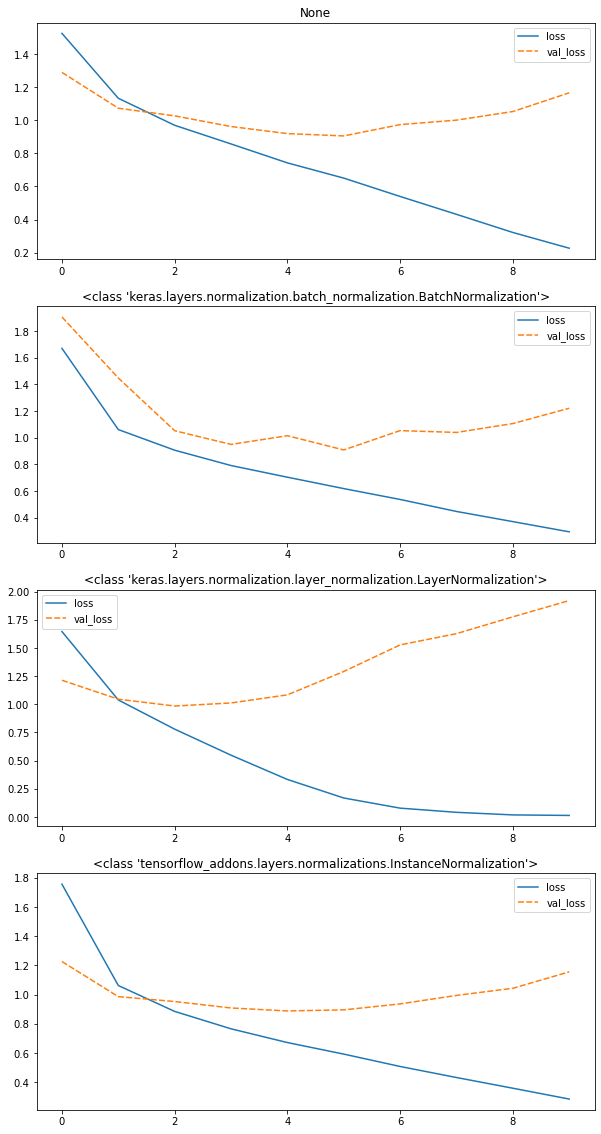

In [47]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    norm_layer_name = str(norm_layers[i])
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(norm_layer_name)

### 実装考察
BaTch正規化とInstance正規化で過学習を抑えることができている。正規化なしとLayer正規化は過学習。

In [48]:
# Dropout
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [49]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

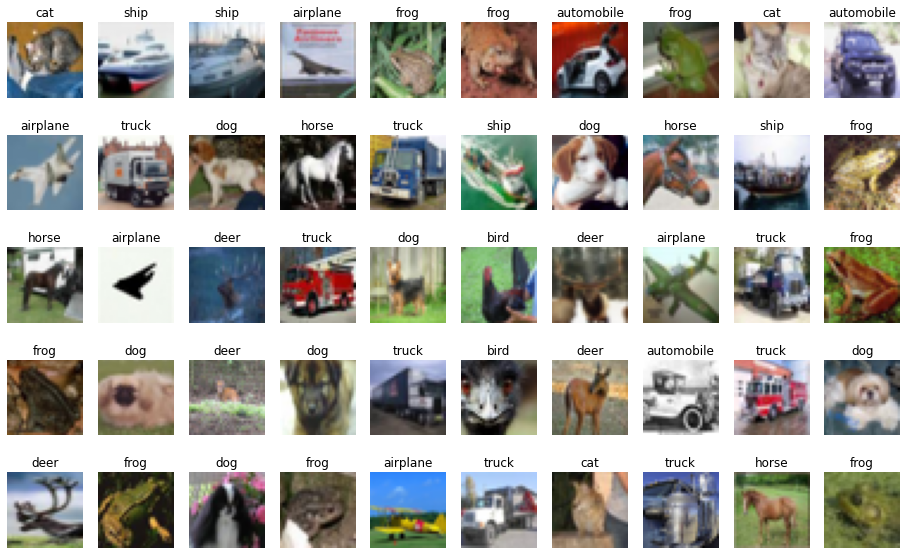

In [50]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

In [51]:
# Dropoutなし
epochs = 5
batch_size = 256

In [52]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [53]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 7200)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               3686912   
                                                                 
 dense_33 (Dense)            (None, 10)                5130      
                                                     

In [54]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 39s 197ms/step - loss: 1.5204 - acc: 0.4557 - val_loss: 1.2703 - val_acc: 0.5606
Epoch 2/5
196/196 [==============================] - 39s 199ms/step - loss: 1.1132 - acc: 0.6116 - val_loss: 1.0523 - val_acc: 0.6342
Epoch 3/5
196/196 [==============================] - 38s 196ms/step - loss: 0.9408 - acc: 0.6715 - val_loss: 0.9873 - val_acc: 0.6564
Epoch 4/5
196/196 [==============================] - 34s 173ms/step - loss: 0.8146 - acc: 0.7185 - val_loss: 0.9560 - val_acc: 0.6645
Epoch 5/5
196/196 [==============================] - 33s 168ms/step - loss: 0.6963 - acc: 0.7594 - val_loss: 0.9146 - val_acc: 0.6823


In [55]:
# Dropoutあり
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [56]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 7200)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               3686912   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                     

In [57]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 35s 174ms/step - loss: 1.6435 - acc: 0.4111 - val_loss: 1.3338 - val_acc: 0.5303
Epoch 2/5
196/196 [==============================] - 34s 172ms/step - loss: 1.2288 - acc: 0.5647 - val_loss: 1.1022 - val_acc: 0.6153
Epoch 3/5
196/196 [==============================] - 34s 171ms/step - loss: 1.0464 - acc: 0.6307 - val_loss: 0.9894 - val_acc: 0.6505
Epoch 4/5
196/196 [==============================] - 34s 173ms/step - loss: 0.9105 - acc: 0.6799 - val_loss: 0.9333 - val_acc: 0.6750
Epoch 5/5
196/196 [==============================] - 34s 173ms/step - loss: 0.8156 - acc: 0.7158 - val_loss: 0.9300 - val_acc: 0.6719


In [58]:
# Dropout有無での比較
def create_model(input_shape, class_num, is_use_dropout, dropout_rate=0.1):
    if is_use_dropout:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [59]:
epochs = 10
batch_size = 256

is_use_dropouts = [
                False,
                True
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for is_use_dropout in is_use_dropouts:
    model = create_model(x_train.shape, 10, is_use_dropout, 0.3)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 34s 172ms/step - loss: 1.5259 - acc: 0.4540 - val_loss: 1.2897 - val_acc: 0.5531
Epoch 2/10
196/196 [==============================] - 34s 171ms/step - loss: 1.1333 - acc: 0.6038 - val_loss: 1.0732 - val_acc: 0.6259
Epoch 3/10
196/196 [==============================] - 33s 170ms/step - loss: 0.9699 - acc: 0.6614 - val_loss: 1.0270 - val_acc: 0.6391
Epoch 4/10
196/196 [==============================] - 33s 169ms/step - loss: 0.8571 - acc: 0.7013 - val_loss: 0.9624 - val_acc: 0.6636
Epoch 5/10
196/196 [==============================] - 33s 169ms/step - loss: 0.7426 - acc: 0.7437 - val_loss: 0.9196 - val_acc: 0.6810
Epoch 6/10
196/196 [==============================] - 34s 172ms/step - loss: 0.6505 - acc: 0.7738 - val_loss: 0.9055 - val_acc: 0.6877
Epoch 7/10
196/196 [==============================] - 34s 171ms/step - loss: 0.5395 - acc: 0.8144 - val_loss: 0.9741 - val_acc: 0.6816
Epoch 8/10
196/196 [==============================] - 3

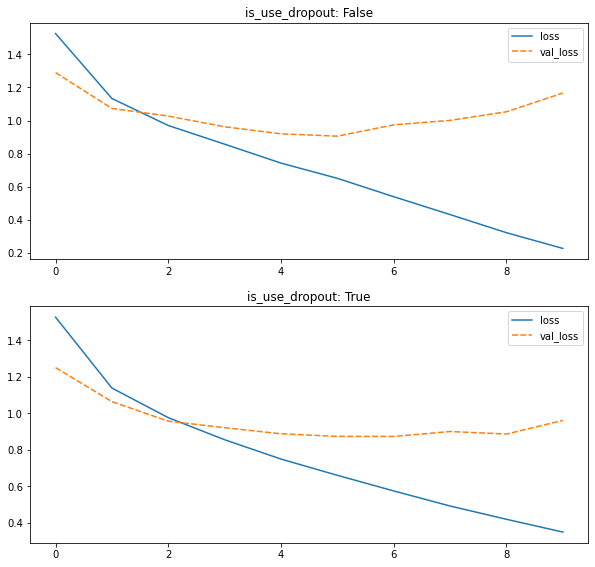

In [60]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(f'is_use_dropout: {is_use_dropouts[i]}')

### 実装考察
ドロップアウトで過学習を抑えることができた。